# DECODING CUSTOMER SENTIMENT TOWARDS SAFARICOM PLC ON X

## Project summary

In today’s digital era, social media plays a pivotal role in shaping public sentiment, particularly in the financial domain. This study focuses on the sentiment analysis of social media discussions, specifically tweets discussing Safaricom PLC on X (formerly Twitter), leveraging Natural Language Processing (NLP) techniques. By systematically collecting and analyzing tweets, we aim to uncover insights into the prevailing sentiment surrounding Safaricom PLC, which can significantly influence consumer perceptions and investment decisions. Utilizing NLP techniques, we will categorize sentiments into positive, negative, and neutral classes, enabling a comprehensive understanding of public opinion and its implications for the company's brand reputation and market performance.

## Business Problem

Safaricom PLC faces significant challenges in customer retention and brand reputation management, particularly in a competitive telecommunications market. Negative sentiment expressed on social media can indicate dissatisfaction with services or products, leading to potential customer churn. To address this, Safaricom can leverage sentiment analysis to gain insights into customer feedback, identify recurring issues, and understand the factors driving consumer sentiment. By proactively monitoring and analyzing these sentiments, the company can enhance service delivery, tailor marketing strategies, and improve customer support, ultimately fostering customer loyalty and strengthening its brand image in the eyes of consumers.

## Import the Necessary Dependencies

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Load the Dataset

In [2]:
data = pd.read_csv('safaricom_tweets.csv', encoding = 'ISO-8859-1')

# Retaining the first 10 columns by selecting them by index
data = data.iloc[:, :10]
data.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Wa-Pots,Itsa_Kumquat,2021-03-31T12:03:51.000Z,Wed Mar 31 12:03:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,Leilati,LeilaaAbubakar,2021-03-31T12:03:05.000Z,Wed Mar 31 12:03:05 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,iamlayaway,layawayuno,2021-03-31T12:02:56.000Z,Wed Mar 31 12:02:56 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,Kiilu Kutoka Kitui ð½,mutuahkiilu,2021-03-31T12:02:39.000Z,Wed Mar 31 12:02:39 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,Boychild UNDER Siegeð,DARSIL254,2021-03-31T12:01:53.000Z,Wed Mar 31 12:01:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ..."


## Exploratory Data Analysis

In [3]:
data.shape

(4161, 10)

In [4]:
data.columns

Index(['Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client'],
      dtype='object')

In [5]:
data.describe()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client
count,4161,4161,4161,4161,4161,4161,4161,4161,4161,4159
unique,3347,2496,2510,2533,3308,3066,1004,1170,1220,127
top,320662182,RT @ReubenKigame : Before I am told to be grat...,Safaricom_Care,2011-06-20T09:20:08.000Z,Mon Jun 20 09:20:08 +0000 2011,1148797,0,0,en,"<a href=""http://twitter.com/download/android"" ..."
freq,201,220,201,201,201,201,1830,1971,1634,1389


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     4161 non-null   object
 1   Text         4161 non-null   object
 2   Name         4161 non-null   object
 3   Screen Name  4161 non-null   object
 4   UTC          4161 non-null   object
 5   Created At   4161 non-null   object
 6   Favorites    4161 non-null   object
 7   Retweets     4161 non-null   object
 8   Language     4161 non-null   object
 9   Client       4159 non-null   object
dtypes: object(10)
memory usage: 325.2+ KB


In [7]:
# Replacing null values in 'Client' column with 'unknown'
data['Client'] = data['Client'].fillna('unknown')

#checking for null values
np.sum(data.isnull().any(axis=1))

0

In [8]:
#checking unique tweets
data['Text'].nunique()

2496

Language Analysis

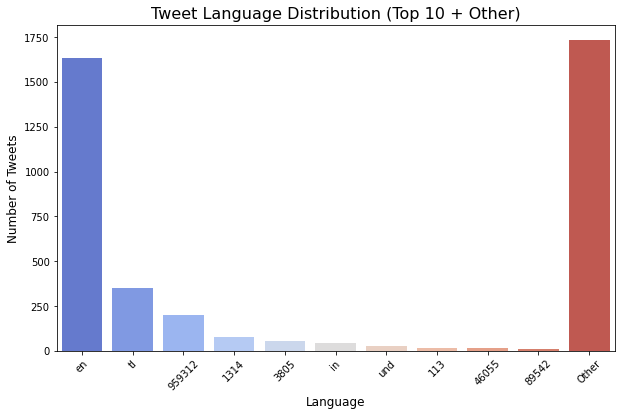

In [9]:
# Count all languages
language_counts = data['Language'].value_counts()

# Aggregate less frequent languages
top_languages = language_counts.head(10)
top_languages['Other'] = language_counts.iloc[10:].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='coolwarm')
plt.title('Tweet Language Distribution (Top 10 + Other)', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Favorites and Retweets Analysis

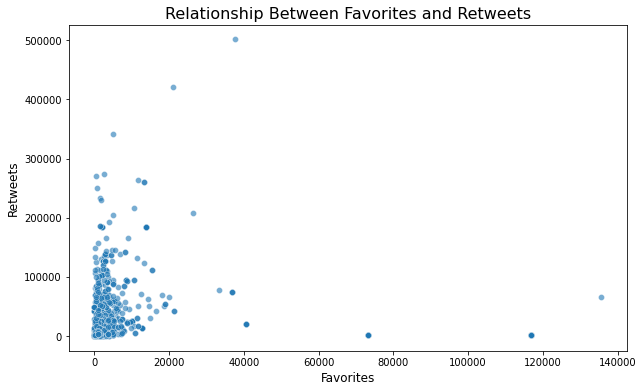

In [10]:
# Converting Favorites and Retweets to integers
data['Favorites'] = pd.to_numeric(data['Favorites'], errors='coerce')
data['Retweets'] = pd.to_numeric(data['Retweets'], errors='coerce')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Favorites', y='Retweets', alpha=0.6)
plt.title('Relationship Between Favorites and Retweets', fontsize=16)
plt.xlabel('Favorites', fontsize=12)
plt.ylabel('Retweets', fontsize=12)
plt.show()

In [11]:
data['Language'].value_counts()

Language
en        1634
tl         350
959312     201
1314        76
3805        54
          ... 
540510       1
3692         1
10893        1
4531         1
8892         1
Name: count, Length: 1220, dtype: int64

## Data cleaning and preprocessing

In [12]:
# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
!pip install emoji

In [14]:
# Text Preprocessing Function
import emoji

# Initializing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", '', text)
    
    # Remove emojis
    text = emoji.demojize(text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    
    # Remove numerical values
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Applying preprocessing to the dataset
data['Preprocessed_Text'] = data['Text'].apply(preprocess_text)

# Displaying the results
data[['Text', 'Preprocessed_Text']].head()

,Text,Preprocessed_Text
0,@Safaricom_Care I have done that many times an...,done many time still get message
1,RT @Elainesoya : @mwangideloh In Garissa behin...,rt garissa behind jihan center safaricom
2,RT @KUcoolkid : Are you in online business and...,rt online business keep running bundle worry r...
3,RT @Liberal_KE : Enjoy YouTube music with safa...,rt enjoy youtube music safaricom youtube bundl...
4,RT @DARSIL254 : Which Paybill are you using if...,rt paybill using buy safaricom airtime


In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Preprocessed_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Assign Sentiment Labels
data['Sentiment'] = data['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Han\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


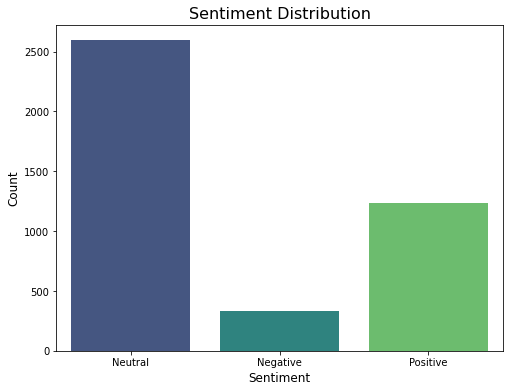

In [16]:
# Plot Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

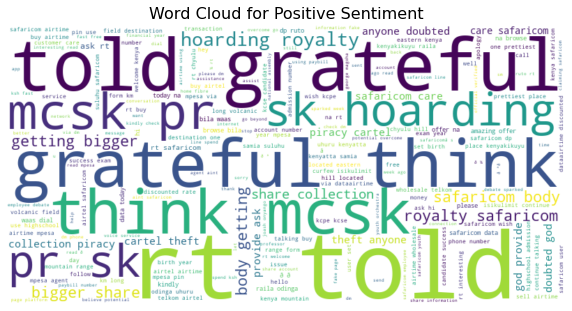

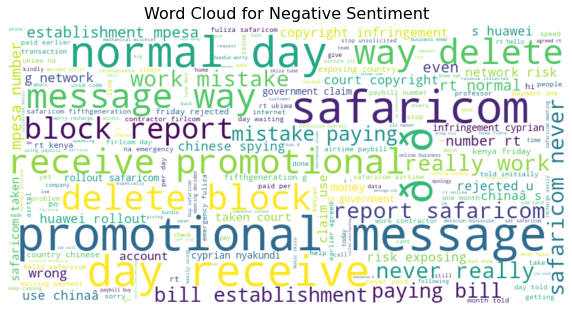

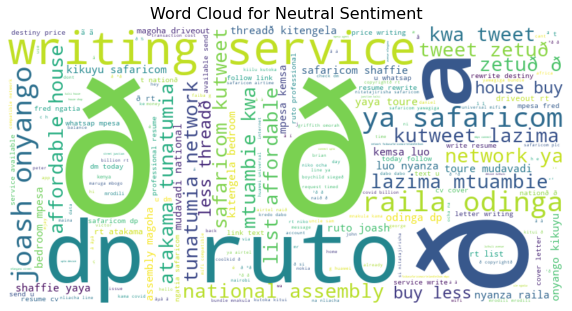

In [17]:
# Word Cloud for Positive Sentiment
positive_text = ' '.join(data[data['Sentiment'] == 'Positive']['Preprocessed_Text'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment', fontsize=16)
plt.show()

# Negative Sentiment
negative_text = ' '.join(data[data['Sentiment'] == 'Negative']['Preprocessed_Text'])
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment', fontsize=16)
plt.show()

# Neutral Sentiment
neutral_text = ' '.join(data[data['Sentiment'] == 'Neutral']['Preprocessed_Text'])
neutral_wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment', fontsize=16)
plt.show()


## Model Training and Evaluation

In [18]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Preprocessed_Text']).toarray()

# Target Variable
y = data['Sentiment']

In [19]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report
              precision    recall  f1-score   support

    Negative       0.92      0.39      0.55        59
     Neutral       0.88      0.98      0.93       507
    Positive       0.95      0.86      0.90       267

    accuracy                           0.90       833
   macro avg       0.92      0.74      0.79       833
weighted avg       0.91      0.90      0.89       833



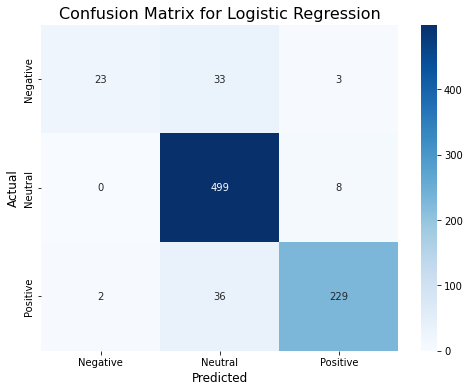

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

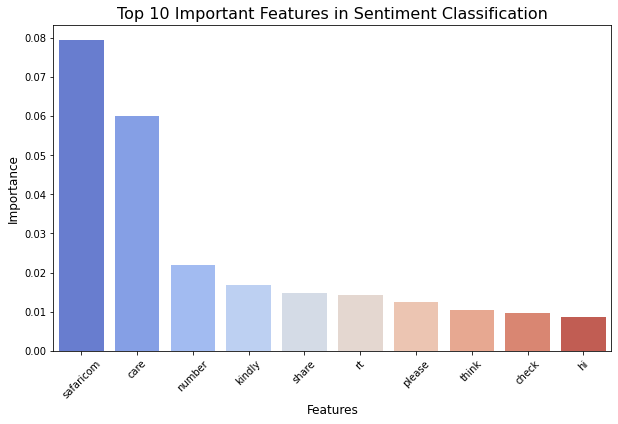

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get Feature Importance
importance = rf.feature_importances_

# Sort feature importance
features = tfidf.get_feature_names_out()
sorted_idx = np.argsort(importance)[::-1]

# Top 10 important features
top_10_features = [features[i] for i in sorted_idx[:10]]
top_10_importance = importance[sorted_idx[:10]]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features, y=top_10_importance, palette='coolwarm')
plt.title('Top 10 Important Features in Sentiment Classification', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Train multiple models to compare performance

# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Support Vector Classifier
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

print("SVC Classification Report")
print(classification_report(y_test, y_pred_svc))

Naive Bayes Classification Report
              precision    recall  f1-score   support

    Negative       0.58      0.42      0.49        59
     Neutral       0.81      0.97      0.88       507
    Positive       0.91      0.63      0.75       267

    accuracy                           0.82       833
   macro avg       0.77      0.67      0.71       833
weighted avg       0.83      0.82      0.81       833

SVC Classification Report
              precision    recall  f1-score   support

    Negative       0.93      0.63      0.75        59
     Neutral       0.93      0.97      0.95       507
    Positive       0.93      0.91      0.92       267

    accuracy                           0.93       833
   macro avg       0.93      0.84      0.87       833
weighted avg       0.93      0.93      0.93       833



In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 2000]
}

# Instantiate Logistic Regression
lr = LogisticRegression()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with best estimator
best_lr = grid_search.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)

# Evaluate best model
print("Best Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_best_lr))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'max_iter': 500}
Best Score: 0.9029361692519589
Best Logistic Regression Classification Report
              precision    recall  f1-score   support

    Negative       0.92      0.56      0.69        59
     Neutral       0.92      0.98      0.95       507
    Positive       0.93      0.90      0.91       267

    accuracy                           0.92       833
   macro avg       0.92      0.81      0.85       833
weighted avg       0.92      0.92      0.92       833

